In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import LabelEncoder, StandardScaler
import skfuzzy as fuzz

# Đọc dữ liệu
crx_data = pd.read_csv('crx.data')

# Mã hóa tất cả các cột dạng chuỗi
le = LabelEncoder()
for column in crx_data.columns:
    if crx_data[column].dtype == type(object):
        crx_data[column] = le.fit_transform(crx_data[column])

# Xử lý giá trị vô cùng
crx_data.replace([np.inf, -np.inf], np.nan, inplace=True)
crx_data.dropna(inplace=True)  # Loại bỏ các hàng chứa NaN

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
crx_data_scaled = pd.DataFrame(scaler.fit_transform(crx_data), columns=crx_data.columns)

# Phân cụm dữ liệu bằng Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
crx_data['cluster_agg'] = agg_clustering.fit_predict(crx_data_scaled)

# Phân cụm dữ liệu bằng KMeans
kmeans = KMeans(n_clusters=3)
crx_data['cluster_kmeans'] = kmeans.fit_predict(crx_data_scaled)

# Phân cụm dữ liệu bằng Fuzzy C-means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(crx_data_scaled.T, 3, 2, error=0.005, maxiter=1000, init=None)
crx_data['cluster_fuzzy_cmeans'] = np.argmax(u, axis=0)

# Phân cụm dữ liệu bằng DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
crx_data['cluster_dbscan'] = dbscan.fit_predict(crx_data_scaled)

# In ra kết quả
print(crx_data.head())

   b  30.83      0  u  g   w  v  1.25  t  t.1  01  f  g.1  00202  0.1  +  \
0  1    327  4.460  2  1  11  4  3.04  1    1   6  0    0     11  560  0   
1  1     89  0.500  2  1  11  4  1.50  1    0   0  0    0     95  824  0   
2  2    125  1.540  2  1  13  8  3.75  1    1   5  1    0     31    3  0   
3  2     43  5.625  2  1  13  8  1.71  1    0   0  0    2     37    0  0   
4  2    167  4.000  2  1  10  8  2.50  1    0   0  1    0    114    0  0   

   cluster_agg  cluster_kmeans  cluster_fuzzy_cmeans  cluster_dbscan  
0            1               0                     1              -1  
1            0               1                     1              -1  
2            1               0                     1              -1  
3            0               1                     1              -1  
4            0               0                     1              -1  


C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in

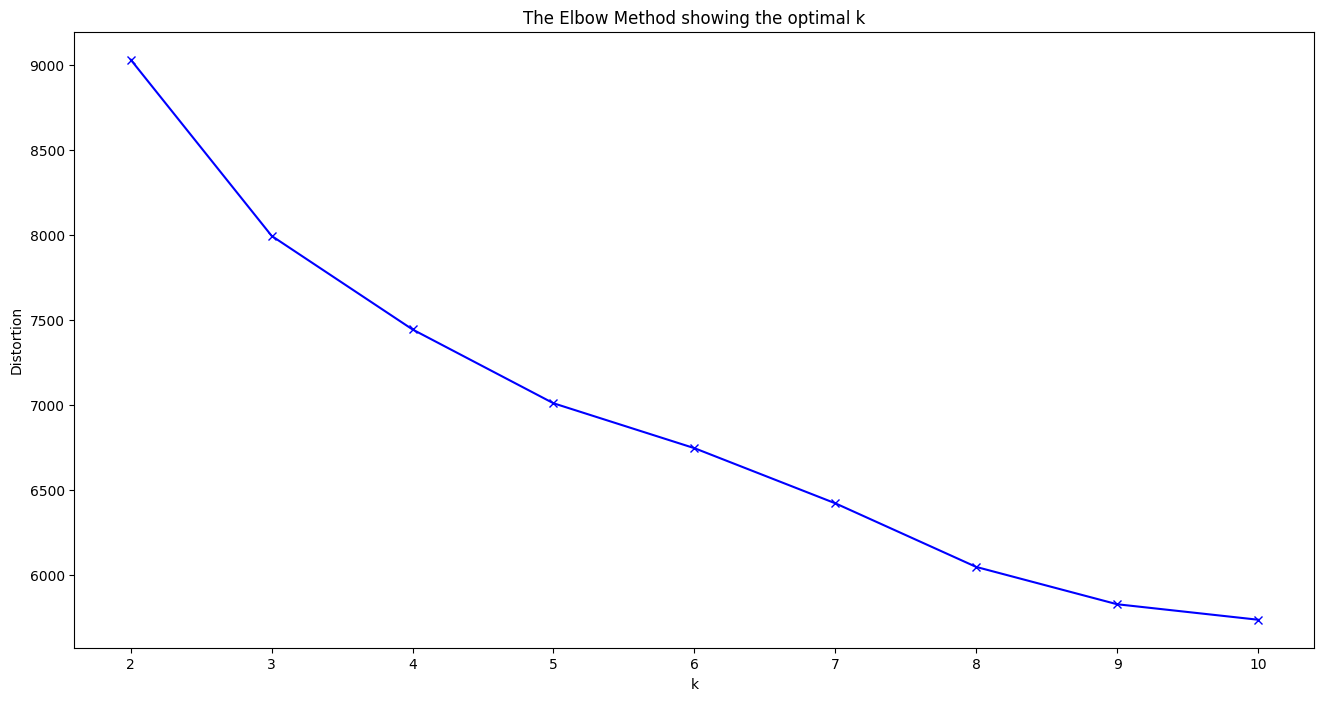

Оптимальное количество кластеров:  10


In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import adjusted_rand_score
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Đọc dữ liệu
crx_data = pd.read_csv('crx.data', header=None)

# Lấy nhãn thực sự và chuyển đổi thành dạng số
true_labels = crx_data.iloc[:, -1].values
true_labels = [1 if label == '+' else 0 for label in true_labels]

# Loại bỏ cột nhãn khỏi dữ liệu
crx_data = crx_data.drop(crx_data.columns[-1], axis=1)

# Mã hóa tất cả các cột dạng chuỗi
le = LabelEncoder()
for column in crx_data.columns:
    if crx_data[column].dtype == type(object):
        crx_data[column] = le.fit_transform(crx_data[column])

# Xử lý giá trị vô cùng
crx_data.replace([np.inf, -np.inf], np.nan, inplace=True)
crx_data.fillna(crx_data.mean(), inplace=True)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
crx_data_scaled = pd.DataFrame(scaler.fit_transform(crx_data), columns=crx_data.columns)

# Tính tổng bình phương khoảng cách
distortions = []
K = range(2, 11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(crx_data_scaled)
    distortions.append(kmeanModel.inertia_)

# Vẽ biểu đồ phương pháp khuỷu tay
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Tìm và in ra số lượng cụm tối ưu
optimal_k = distortions.index(min(distortions)) + 2
print("Оптимальное количество кластеров: ", optimal_k)

In [3]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# Đọc dữ liệu
crx_data = pd.read_csv('crx.data', header=None)

# Lấy nhãn thực sự và chuyển đổi thành dạng số
true_labels = crx_data.iloc[:, -1].values
true_labels = [1 if label == '+' else 0 for label in true_labels]

# Loại bỏ cột nhãn khỏi dữ liệu
crx_data = crx_data.drop(crx_data.columns[-1], axis=1)

# Mã hóa tất cả các cột dạng chuỗi
le = LabelEncoder()
for column in crx_data.columns:
    if crx_data[column].dtype == type(object):
        crx_data[column] = le.fit_transform(crx_data[column])

# Xử lý giá trị vô cùng
crx_data.replace([np.inf, -np.inf], np.nan, inplace=True)
crx_data.fillna(crx_data.mean(), inplace=True)

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
crx_data_scaled = pd.DataFrame(scaler.fit_transform(crx_data), columns=crx_data.columns)


# Phân cụm dữ liệu bằng KMeans với số lượng cụm tối ưu
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(crx_data_scaled)
predicted_labels = kmeans.labels_

# Tính và in ra ARI, NMI, FMI cho KMeans
ari = adjusted_rand_score(true_labels, predicted_labels)
nmi = normalized_mutual_info_score(true_labels, predicted_labels)
fmi = fowlkes_mallows_score(true_labels, predicted_labels)
print('Adjusted Rand Index for KMeans: ', ari)
print('Normalized Mutual Information for KMeans: ', nmi)
print('Fowlkes-Mallows Index for KMeans: ', fmi)

# Phân cụm dữ liệu bằng Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_clustering.fit_predict(crx_data_scaled)

# Tính và in ra ARI, NMI, FMI cho Agglomerative Clustering
ari_agg = adjusted_rand_score(true_labels, agg_labels)
nmi_agg = normalized_mutual_info_score(true_labels, agg_labels)
fmi_agg = fowlkes_mallows_score(true_labels, agg_labels)
print('Adjusted Rand Index for Agglomerative Clustering: ', ari_agg)
print('Normalized Mutual Information for Agglomerative Clustering: ', fmi_agg)
# Phân cụm dữ liệu bằng Fuzzy C-means
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(crx_data_scaled.T, optimal_k, 2, error=0.005, maxiter=1000, init=None)
fuzzy_labels = np.argmax(u, axis=0)

# Tính và in ra ARI, NMI, FMI cho Fuzzy C-means
ari_fuzzy = adjusted_rand_score(true_labels, fuzzy_labels)
nmi_fuzzy = normalized_mutual_info_score(true_labels, fuzzy_labels)
fmi_fuzzy = fowlkes_mallows_score(true_labels, fuzzy_labels)
print('Adjusted Rand Index for Fuzzy C-means: ', ari_fuzzy)
print('Normalized Mutual Information for Fuzzy C-means: ', nmi_fuzzy)
print('Fowlkes-Mallows Index for Fuzzy C-means: ', fmi_fuzzy)

# Phân cụm dữ liệu bằng DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=6)
dbscan_labels = dbscan.fit_predict(crx_data_scaled)

# Tính và in ra ARI, NMI, FMI cho DBSCAN
ari_dbscan = adjusted_rand_score(true_labels, dbscan_labels)
nmi_dbscan = normalized_mutual_info_score(true_labels, dbscan_labels)
fmi_dbscan = fowlkes_mallows_score(true_labels, dbscan_labels)
print('Adjusted Rand Index for DBSCAN: ', ari_dbscan)
print('Normalized Mutual Information for DBSCAN: ', nmi_dbscan)
print('Fowlkes-Mallows Index for DBSCAN: ', fmi_dbscan)

Adjusted Rand Index for KMeans:  0.0909531100991691
Normalized Mutual Information for KMeans:  0.15107337629208603
Fowlkes-Mallows Index for KMeans:  0.3390519037815892
Adjusted Rand Index for Agglomerative Clustering:  0.07537639863684209
Normalized Mutual Information for Agglomerative Clustering:  0.3645784507786931
Adjusted Rand Index for Fuzzy C-means:  0.34052076775083395
Normalized Mutual Information for Fuzzy C-means:  0.2620626412147014
Fowlkes-Mallows Index for Fuzzy C-means:  0.6411638884380686
Adjusted Rand Index for DBSCAN:  0.0
Normalized Mutual Information for DBSCAN:  0.0
Fowlkes-Mallows Index for DBSCAN:  0.7108790805200357


C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


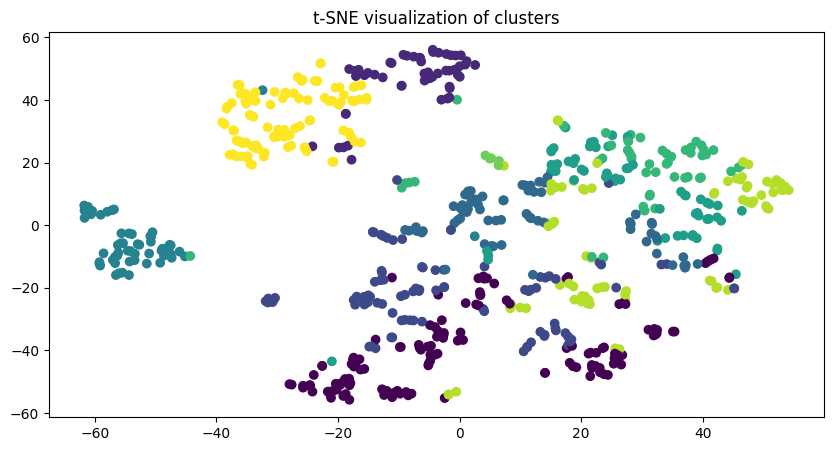

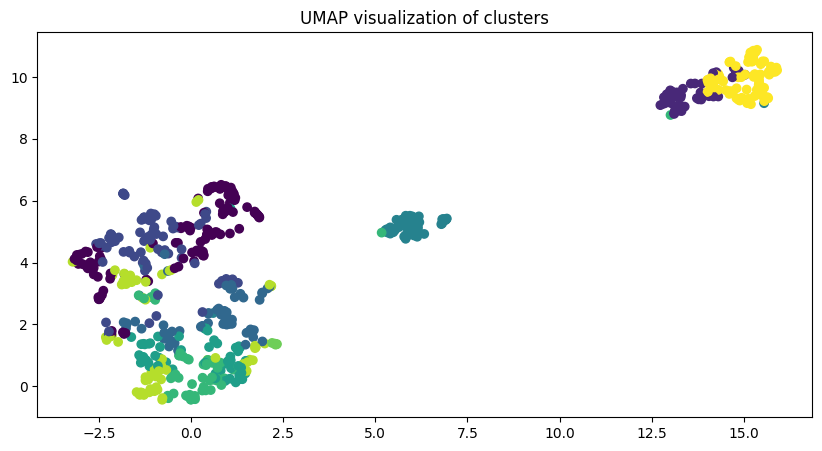

In [4]:
from sklearn.manifold import TSNE
import umap
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Sử dụng t-SNE để giảm kích thước dữ liệu
tsne = TSNE(n_components=2, perplexity=10)
crx_data_tsne = tsne.fit_transform(crx_data_scaled)

# Sử dụng UMAP để giảm kích thước dữ liệu
reducer = umap.UMAP()
crx_data_umap = reducer.fit_transform(crx_data_scaled)

# Trực quan hóa kết quả phân cụm bằng t-SNE
plt.figure(figsize=(10, 5))
plt.scatter(crx_data_tsne[:, 0], crx_data_tsne[:, 1], c=predicted_labels)
plt.title('t-SNE visualization of clusters')
plt.show()

# Trực quan hóa kết quả phân cụm bằng UMAP
plt.figure(figsize=(10, 5))
plt.scatter(crx_data_umap[:, 0], crx_data_umap[:, 1], c=predicted_labels)
plt.title('UMAP visualization of clusters')
plt.show()

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


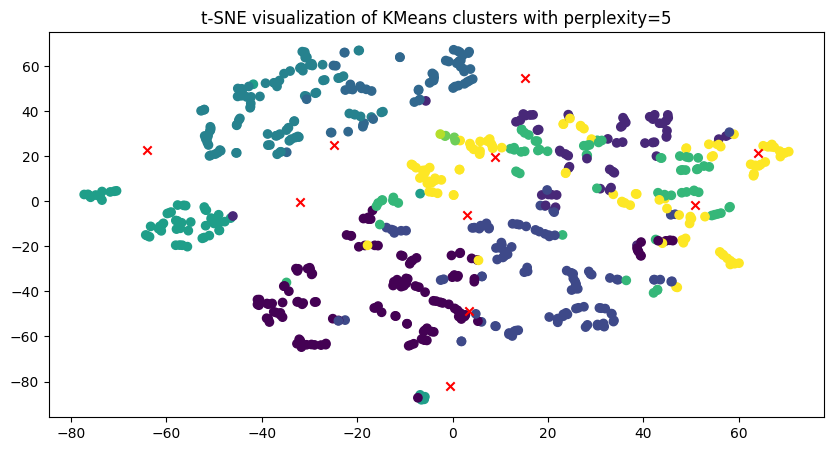

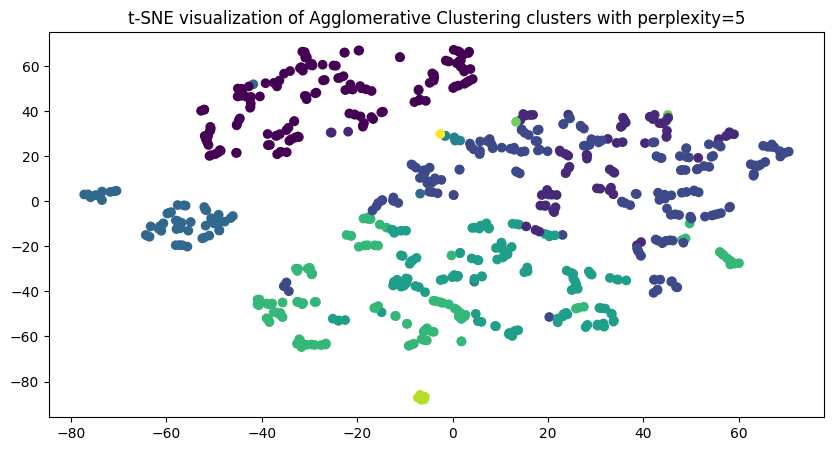

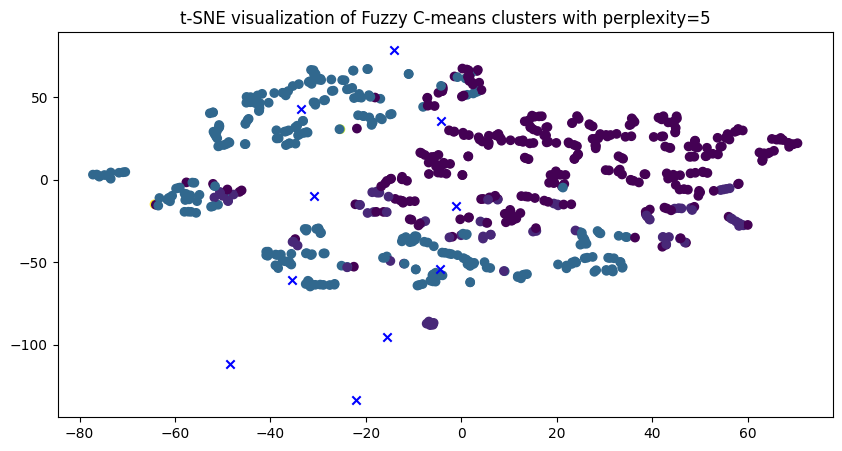

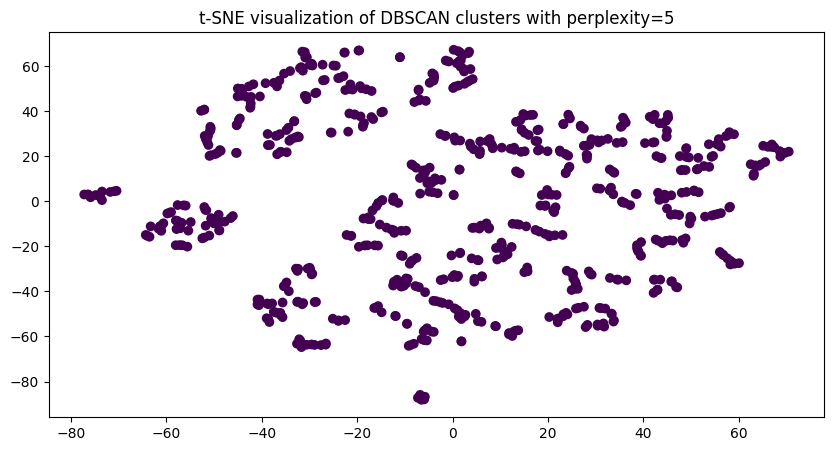

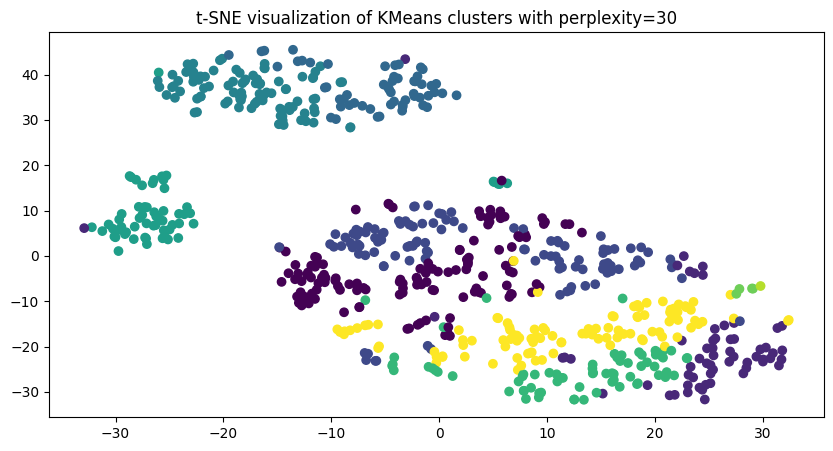

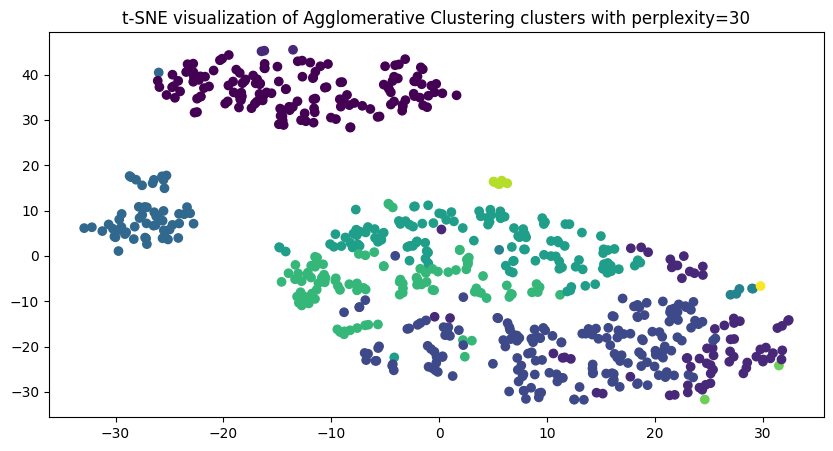

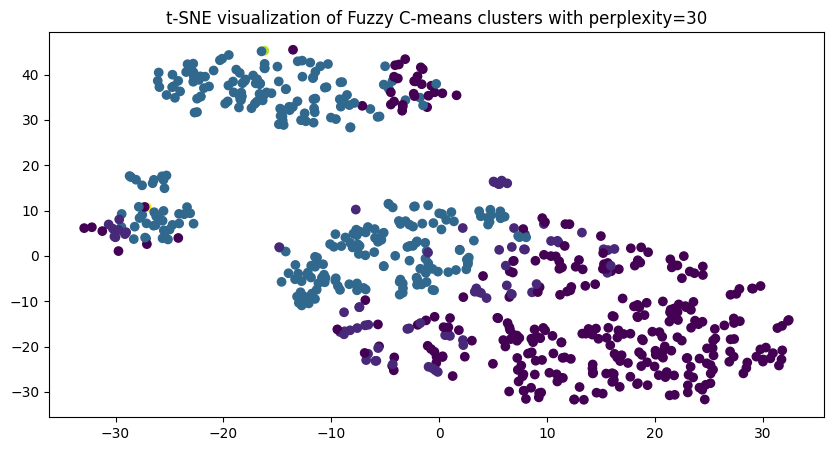

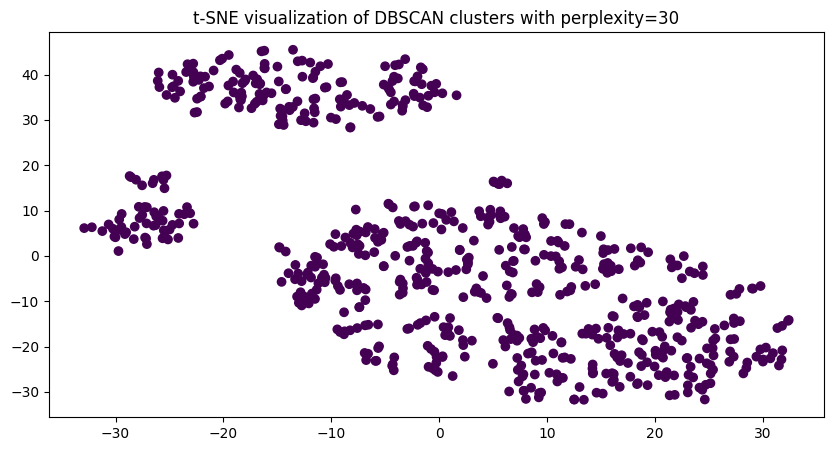

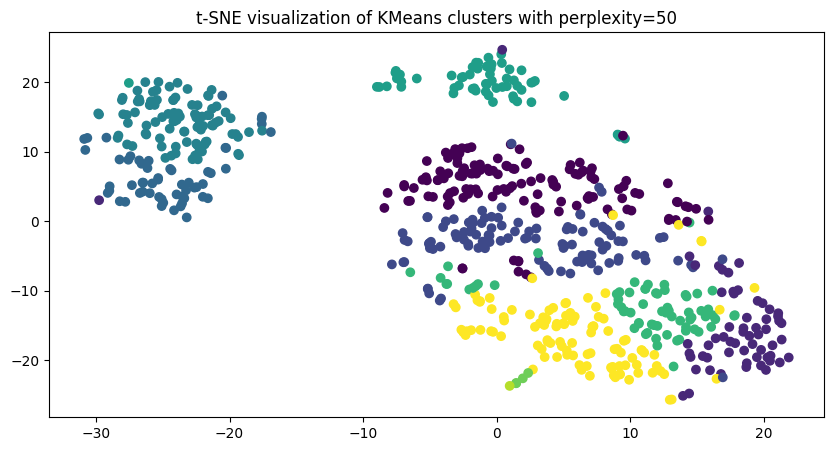

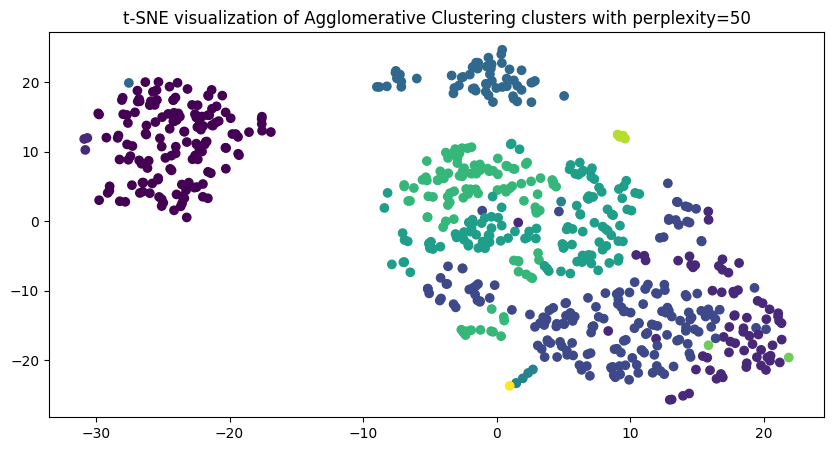

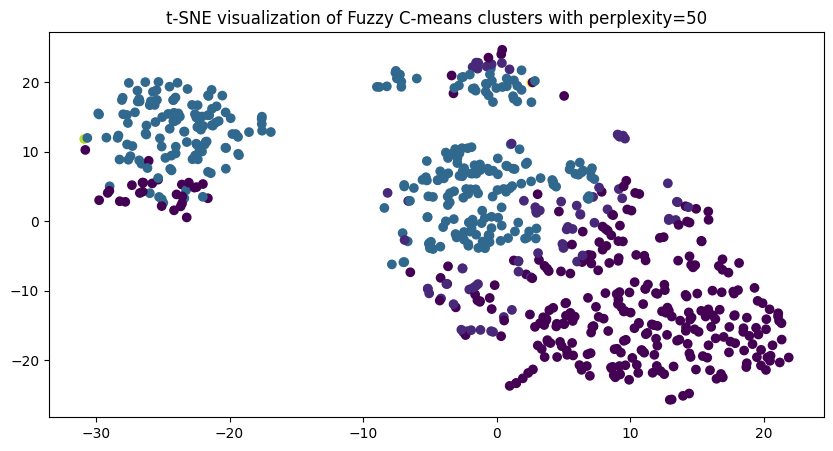

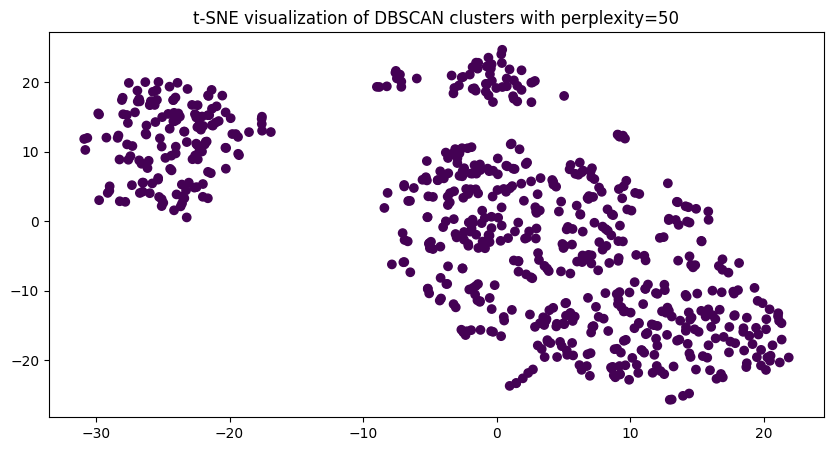

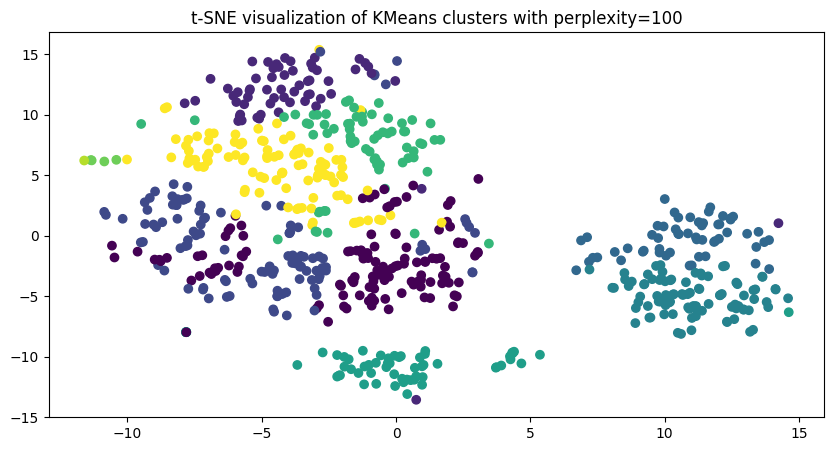

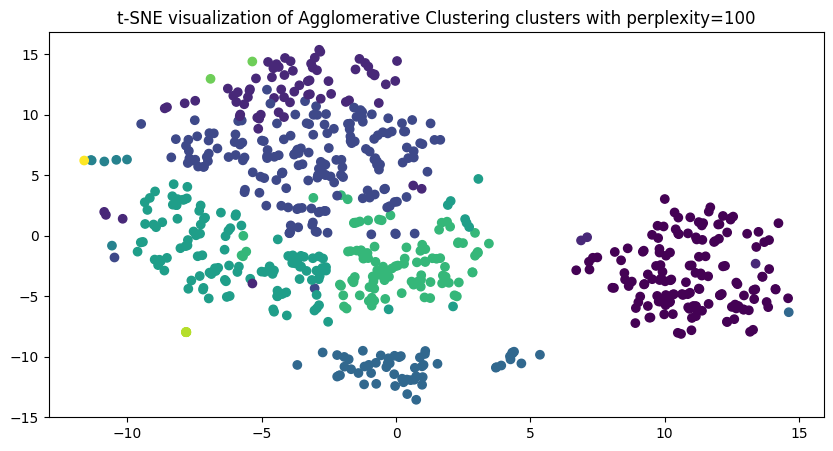

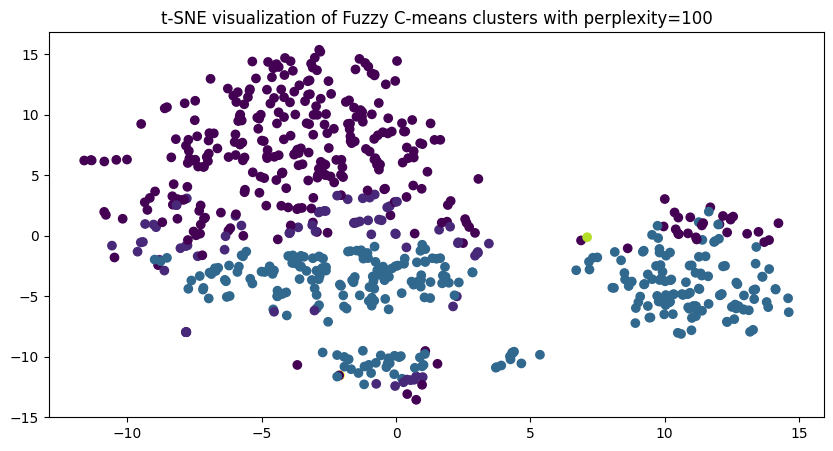

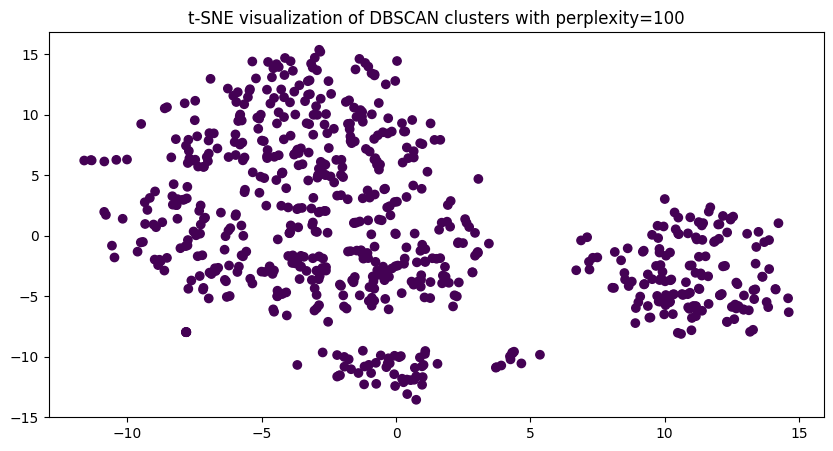

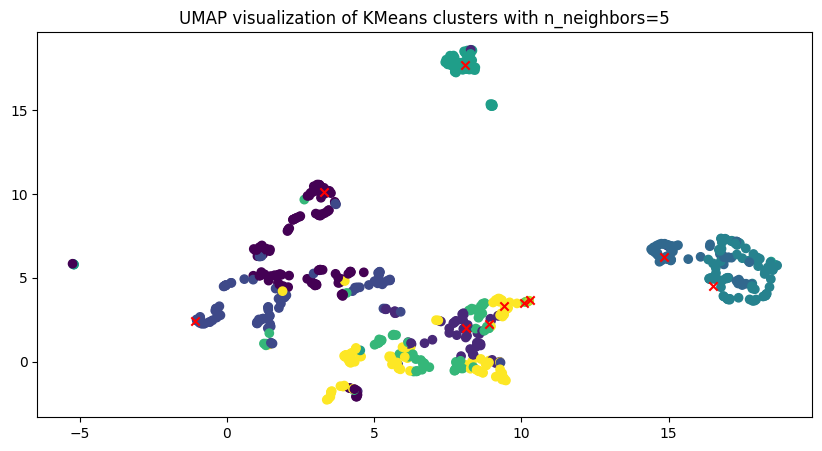

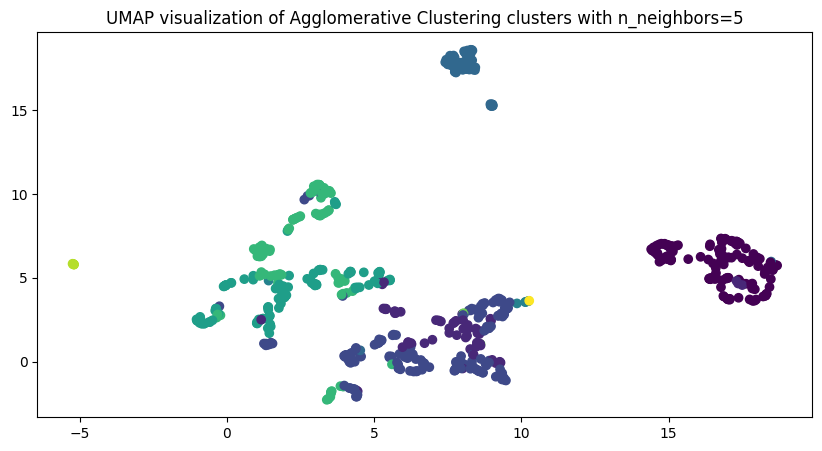

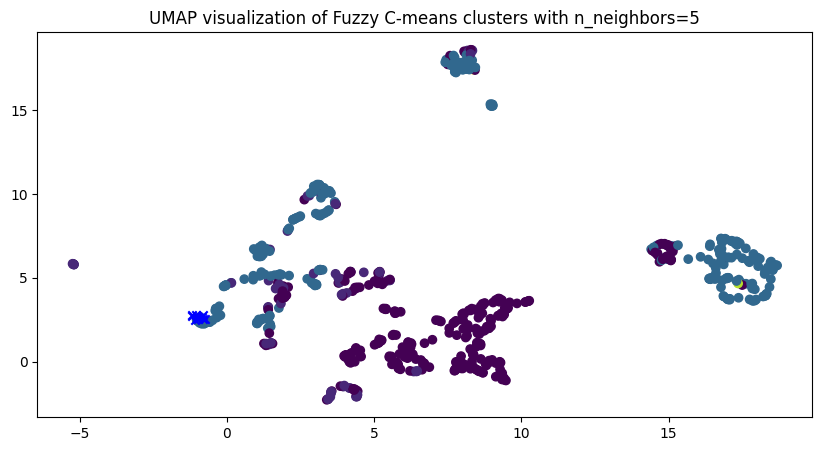

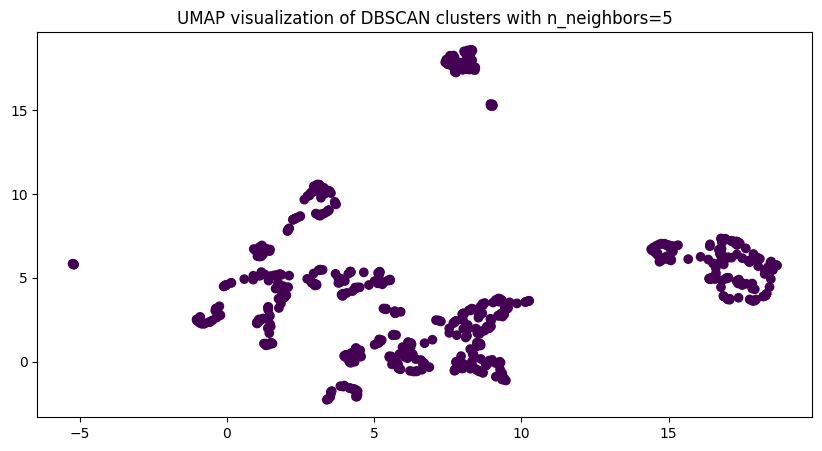

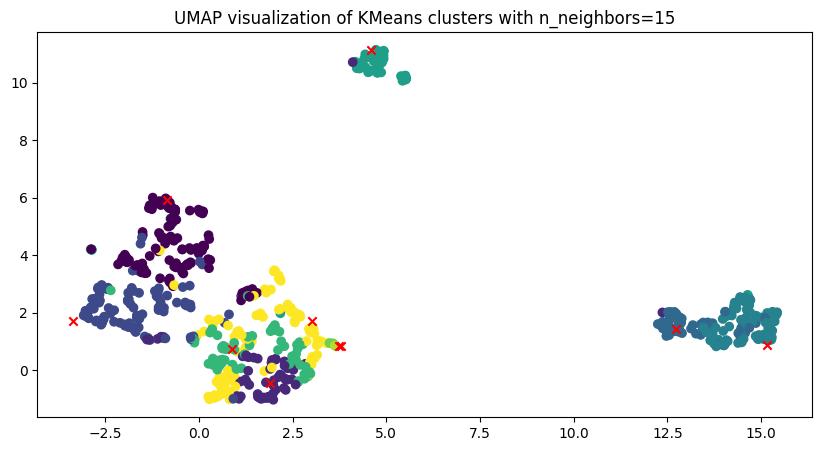

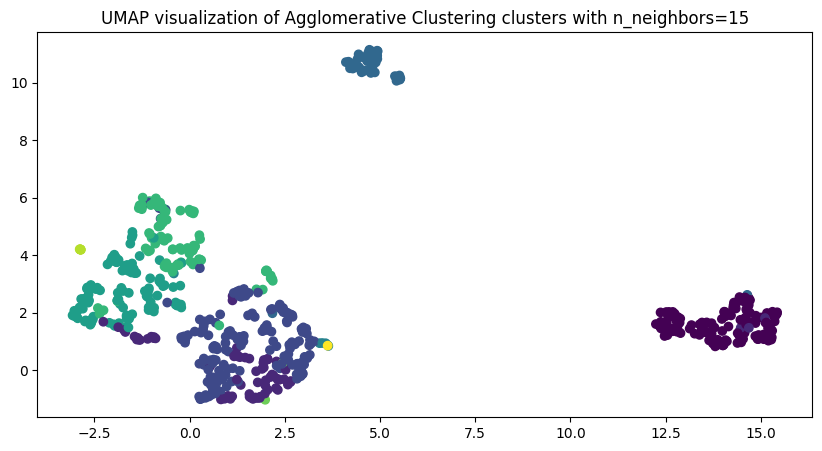

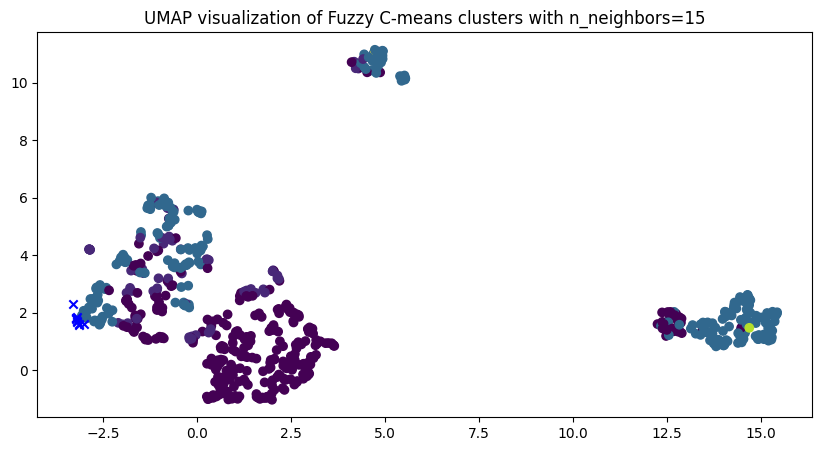

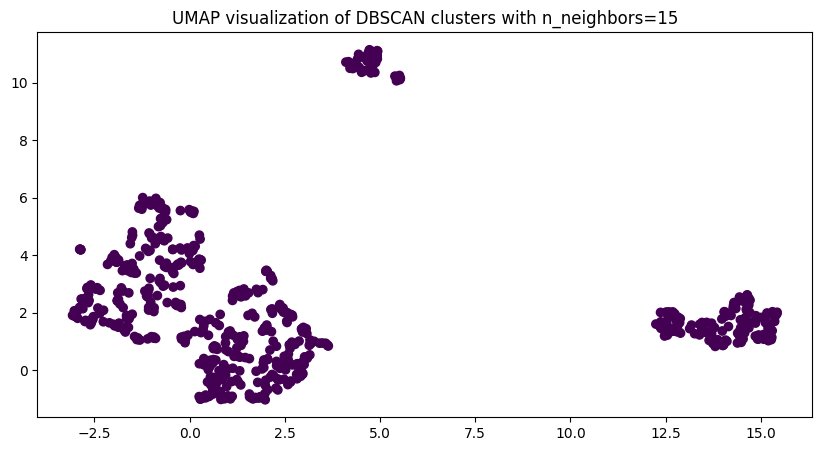

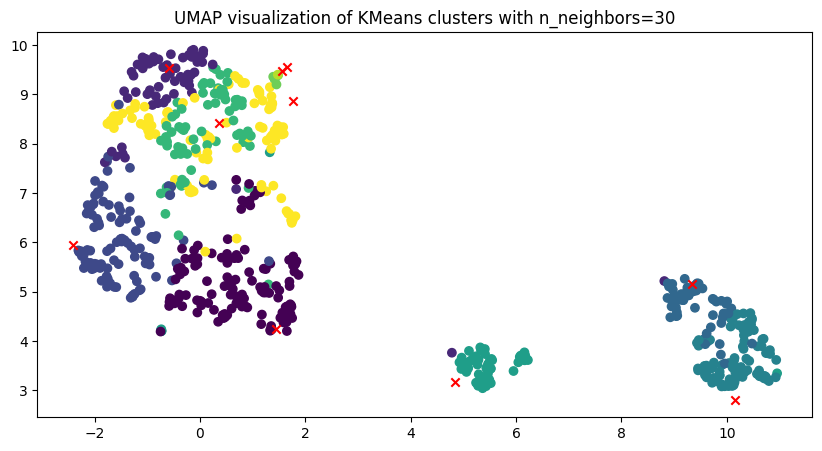

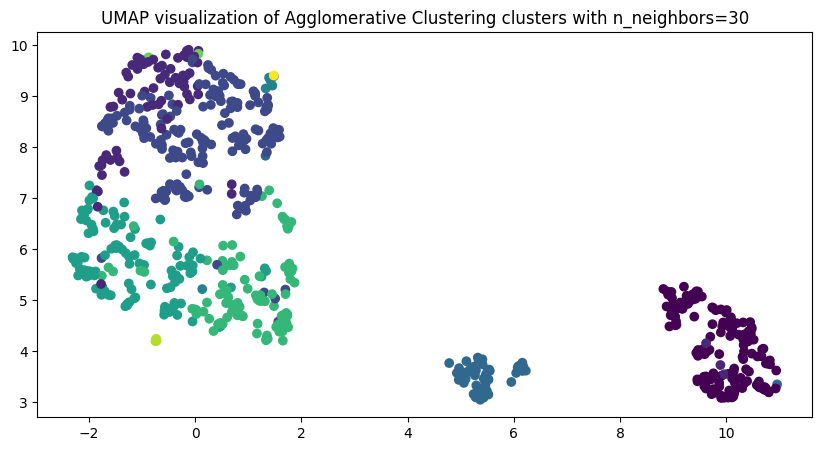

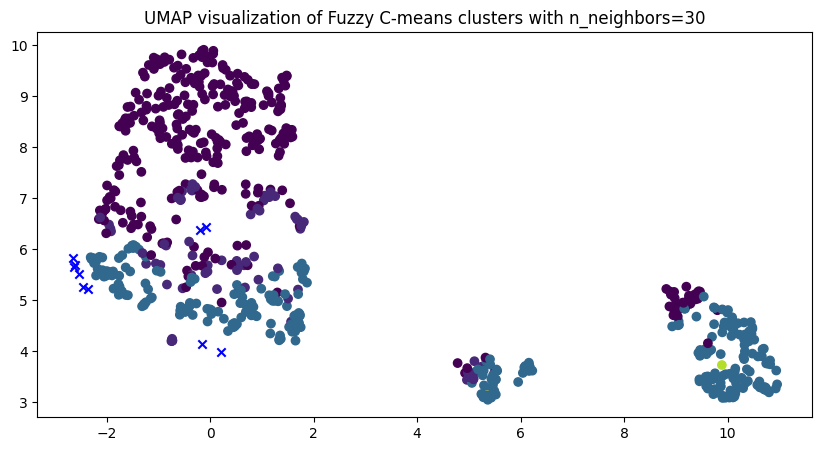

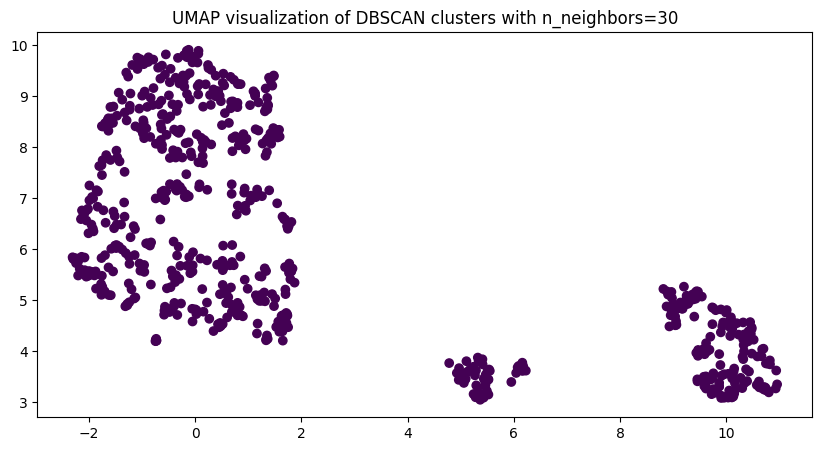

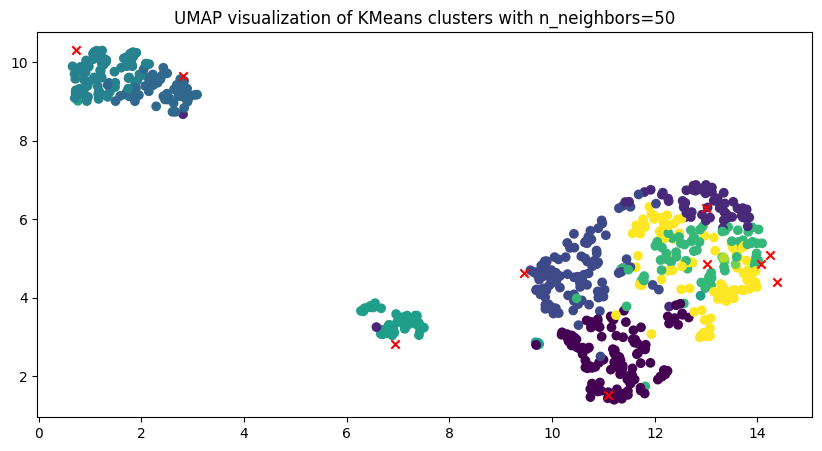

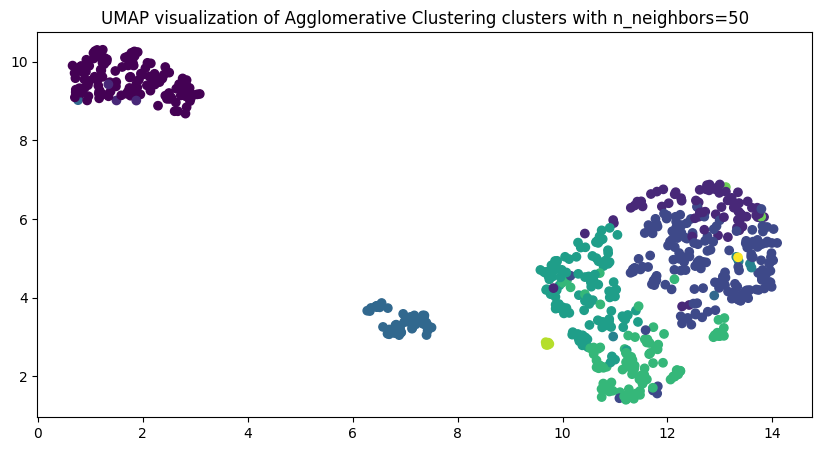

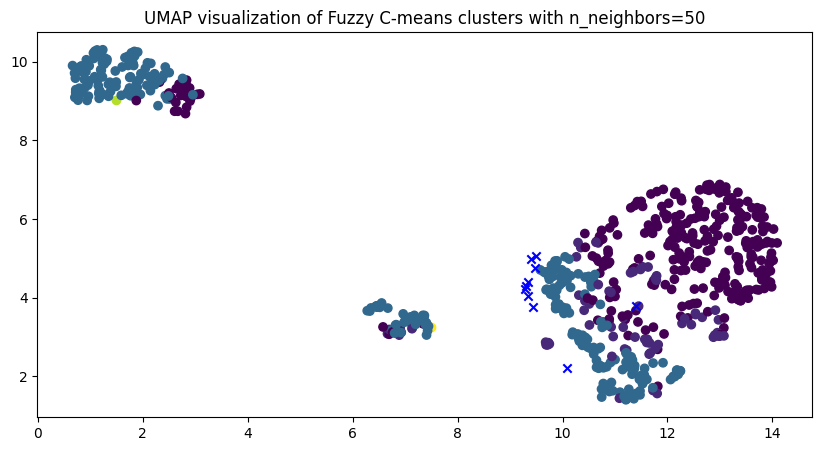

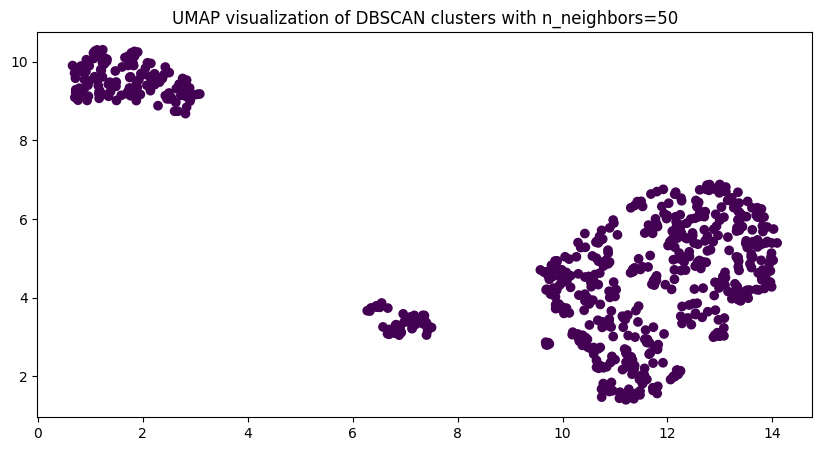

In [5]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Sử dụng KMeans với k tối ưu
kmeans = KMeans(n_clusters=optimal_k)
kmeans.fit(crx_data_scaled)
predicted_labels = kmeans.labels_

# Danh sách các nhãn được dự đoán từ các thuật toán phân cụm
predicted_labels_list = [predicted_labels, agg_labels, fuzzy_labels, dbscan_labels]
titles = ['KMeans', 'Agglomerative Clustering', 'Fuzzy C-means', 'DBSCAN']

# Trọng tâm cụm từ KMeans và Fuzzy C-means
kmeans_centers = kmeans.cluster_centers_
fuzzy_centers = cntr

# Sử dụng t-SNE và UMAP để giảm kích thước dữ liệu với các giá trị tham số khác nhau
for perplexity in [5, 30, 50, 100]:
    tsne = TSNE(n_components=2, perplexity=perplexity)
    crx_data_tsne = tsne.fit_transform(crx_data_scaled)
    
    if kmeans_centers.shape[0] > perplexity:
        kmeans_centers_tsne = tsne.fit_transform(kmeans_centers)
    if fuzzy_centers.shape[0] > perplexity:
        fuzzy_centers_tsne = tsne.fit_transform(fuzzy_centers)

    for i, predicted_labels in enumerate(predicted_labels_list):
        plt.figure(figsize=(10, 5))
        plt.scatter(crx_data_tsne[:, 0], crx_data_tsne[:, 1], c=predicted_labels)
        if titles[i] == 'KMeans' and kmeans_centers.shape[0] > perplexity:
            plt.scatter(kmeans_centers_tsne[:, 0], kmeans_centers_tsne[:, 1], c='red', marker='x')
        elif titles[i] == 'Fuzzy C-means' and fuzzy_centers.shape[0] > perplexity:
            plt.scatter(fuzzy_centers_tsne[:, 0], fuzzy_centers_tsne[:, 1], c='blue', marker='x')
        plt.title(f't-SNE visualization of {titles[i]} clusters with perplexity={perplexity}')
        plt.show()

for n_neighbors in [5, 15, 30, 50]:
    reducer = umap.UMAP(n_neighbors=n_neighbors)
    crx_data_umap = reducer.fit_transform(crx_data_scaled)
    kmeans_centers_umap = reducer.transform(kmeans_centers)
    fuzzy_centers_umap = reducer.transform(fuzzy_centers)

    for i, predicted_labels in enumerate(predicted_labels_list):
        plt.figure(figsize=(10, 5))
        plt.scatter(crx_data_umap[:, 0], crx_data_umap[:, 1], c=predicted_labels)
        if titles[i] == 'KMeans':
            plt.scatter(kmeans_centers_umap[:, 0], kmeans_centers_umap[:, 1], c='red', marker='x')
        elif titles[i] == 'Fuzzy C-means':
            plt.scatter(fuzzy_centers_umap[:, 0], fuzzy_centers_umap[:, 1], c='blue', marker='x')
        plt.title(f'UMAP visualization of {titles[i]} clusters with n_neighbors={n_neighbors}')
        plt.show()

C:\Users\TO THANH\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


NameError: name 'silhouette_samples' is not defined

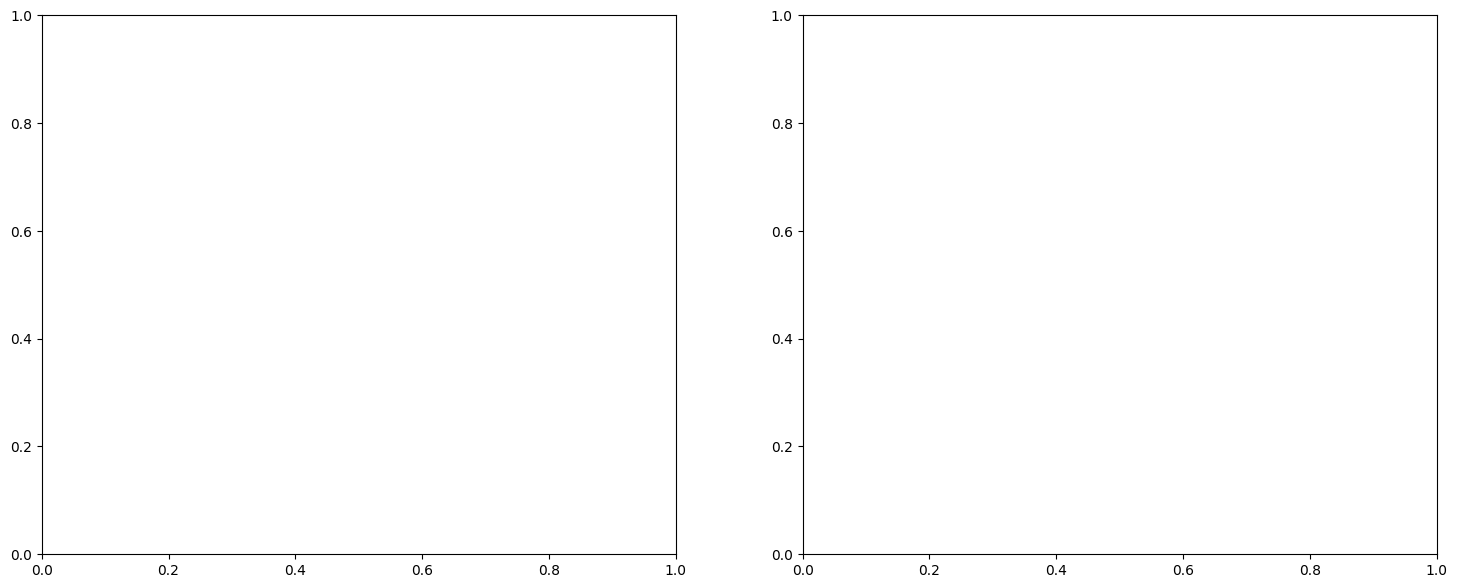

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Tạo dữ liệu mẫu
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Tạo một subplot với 1 dòng và 2 cột
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # Khởi tạo thuật toán KMeans
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Tính điểm Silhouette
    silhouette_avg = silhouette_score(X, cluster_labels)

    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Tính điểm Silhouette cho mỗi mẫu
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()